# Tutorail 1: Defining a baseline and determining UV coverage

In [3]:
from utils.plot_observation import *
from utils.interferometry_objects import *

## Baseline definition
 First of all we have to define a baseline by giving the spatial (x, y, z) coordinates of two telescopes, as well as their latitude. The latitude parameter must be passed as instance of the class: angle_deg_min_sec, which gives a degrees object with the form (in this example): $20^\circ~15'~18''$. <br><br> From this, we can call a baseline instance from the SII_observation library (SII_observation.utils.interferometry_objects)

 

In [4]:
coord_t_1 = np.array([0, 10, 0.1])
coord_t_2 = np.array([50, 30, 0.2])

latitude = angle_deg_min_sec(20, 15, 18)
physical_baseline = baseline(coord_t_1, coord_t_2, latitude)

## Source's position definition
Secondly we want to define the source's parameters and the observation duration in hours, which defines the hour angle

In [5]:
declination = angle_deg_min_sec(30,-43,-17.34)
duration = [-4, 4]

## Computation of the spatial frequencies u,v,w
Supposing that we can perform interfero-spectrometric measurement, we can call 4 instances (for 4 different wavelengths) of the spatial_frequency class, that allows us to access the u,v,w spatial frequencies, needed to determine the UV-plane coverage

In [6]:
uvw = spatial_frequency(physical_baseline, duration,600,450e-9, declination)
uwu_2 = spatial_frequency(physical_baseline, duration,600,500e-9, declination)
uwu_3 = spatial_frequency(physical_baseline, duration, 600, 550e-9, declination)
uwu_4 = spatial_frequency(physical_baseline, duration, 600, 600e-9, declination)

## Plotting
First, we can plot the uvw instance in the UV-plane (Fourier space), through the plot_uv_plane function. The result is given in units of thousands of lambdas $k\lambda$

<Axes: title={'center': 'Observation UV-plane (real space'}, xlabel='u  [k$\\lambda$]', ylabel='v  [k$\\lambda$]'>

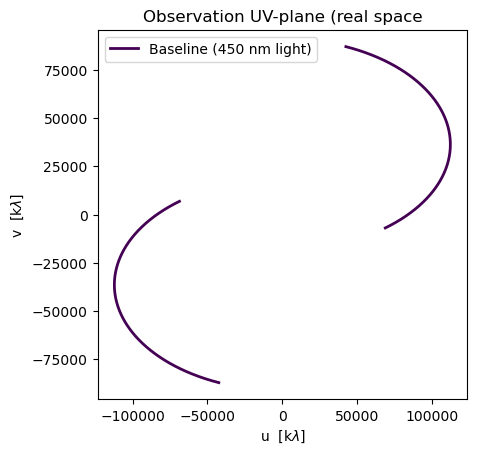

In [7]:
plot_uv_plane(uvw, baseline_name='(450 nm light)')

The same plot can be also expressed with the plot_spatial_uv_plane function, that allows us to visualize the UV plane but in real space. The results are given as projected baselines in meters.

<Axes: title={'center': 'Observation projected baseline'}, xlabel='u  [m]', ylabel='v  [m]'>

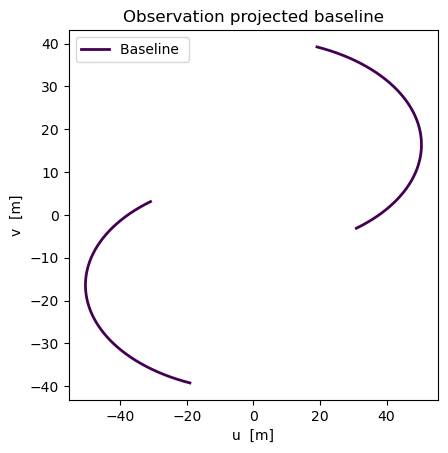

In [8]:
plot_spatial_uv_plane(uwu_2, baseline_name='')

We can plot all the UV-baselines in the Fourier UV-plane for several frequencies (those defined by the instances uvw, uvw_2, uvw_3 and uvw_4). To do so, we exploit the fact that plot_uv_plane function returns the generated ax matplotlib object. By passing this ax in the "ax" argument of the function, you can join different plots in the same axis. 

<Axes: title={'center': 'Observation UV-plane (real space'}, xlabel='u  [k$\\lambda$]', ylabel='v  [k$\\lambda$]'>

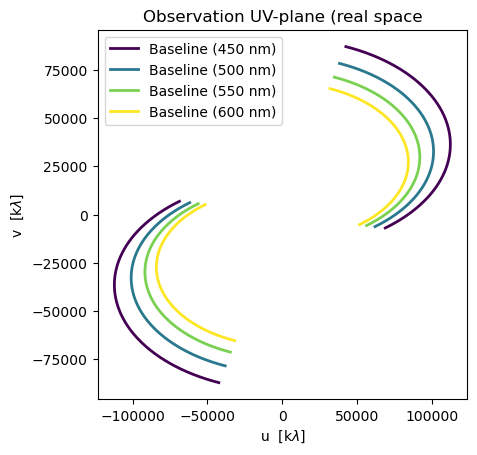

In [9]:
ax=plot_uv_plane(uvw, baseline_name='(450 nm)')
plot_uv_plane(uwu_2, ax=ax, baseline_name='(500 nm)')
plot_uv_plane(uwu_3, ax=ax, baseline_name='(550 nm)')
plot_uv_plane(uwu_4, ax=ax, baseline_name='(600 nm)')

<Axes: title={'center': 'Baseline optical delay'}, xlabel='Observation time [hours]', ylabel='Optical delay [ps]'>

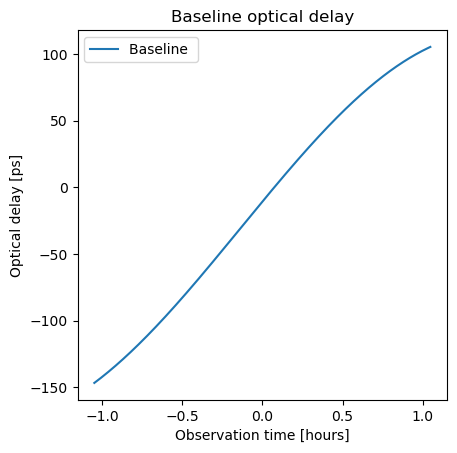

In [10]:
plot_telescopes_delay(uvw)